In [118]:
import pandas as pd


file_path = 'network_scanner_metrics.jsonl'

df = pd.read_json(file_path, lines=True)
df.head(20)

,attempt_time,success,final_state,tests_passed,tests_failed,tests_skipped,prompt_tokens,completion_tokens,total_tokens,error,iteration,attempt
0,115.895976,False,TEST,7,1,0,3349,1185,4534,Tests failed. Logs:\nstdout:\nStarting >>> net...,1,1
1,98.886515,False,TEST,7,1,0,3349,1177,4526,Tests failed. Logs:\nstdout:\nStarting >>> net...,1,2
2,119.827250,False,TEST,7,1,0,3349,1185,4534,Tests failed. Logs:\nstdout:\nStarting >>> net...,1,3
3,94.965203,False,TEST,7,1,0,3349,1137,4486,Tests failed. Logs:\nstdout:\nStarting >>> net...,1,4
4,121.022291,False,TEST,7,1,0,3349,1150,4499,Tests failed. Logs:\nstdout:\nStarting >>> net...,1,5
5,117.035142,False,TEST,7,1,0,3349,1135,4484,Tests failed. Logs:\nstdout:\nStarting >>> net...,1,6
6,99.018114,False,TEST,7,1,0,3349,1173,4522,Tests failed. Logs:\nstdout:\nStarting >>> net...,1,7
7,130.290673,True,SUCCESS,9,0,0,3349,1185,4534,None,1,8
8,37.509846,False,TEST,1,0,0,3349,1080,4429,Tests failed. Logs:\nstdout:\nStarting >>> net...,2,1
9,37.853240,False,TEST,1,0,0,3349,1137,4486,Tests failed. Logs:\nstdout:\nStarting >>> net...,2,2


In [119]:
# AVG attempts time
round(df.loc[df['success']==True,'attempt_time'].mean(),0)

np.float64(119.0)

In [120]:
# MAX total tokens
df['total_tokens'].max()

np.int64(4661)

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(rc={
    'figure.figsize':(8, 5), 
    'figure.dpi': 300, 
    # 'axes.titlesize': 16, 
    # 'axes.labelsize': 14, 
    # 'xtick.labelsize': 12, 
    # 'ytick.labelsize': 12, 
    # 'legend.fontsize': 12, 
    # 'legend.title_fontsize': 14
    }, style='darkgrid', 
    font_scale=1.0)


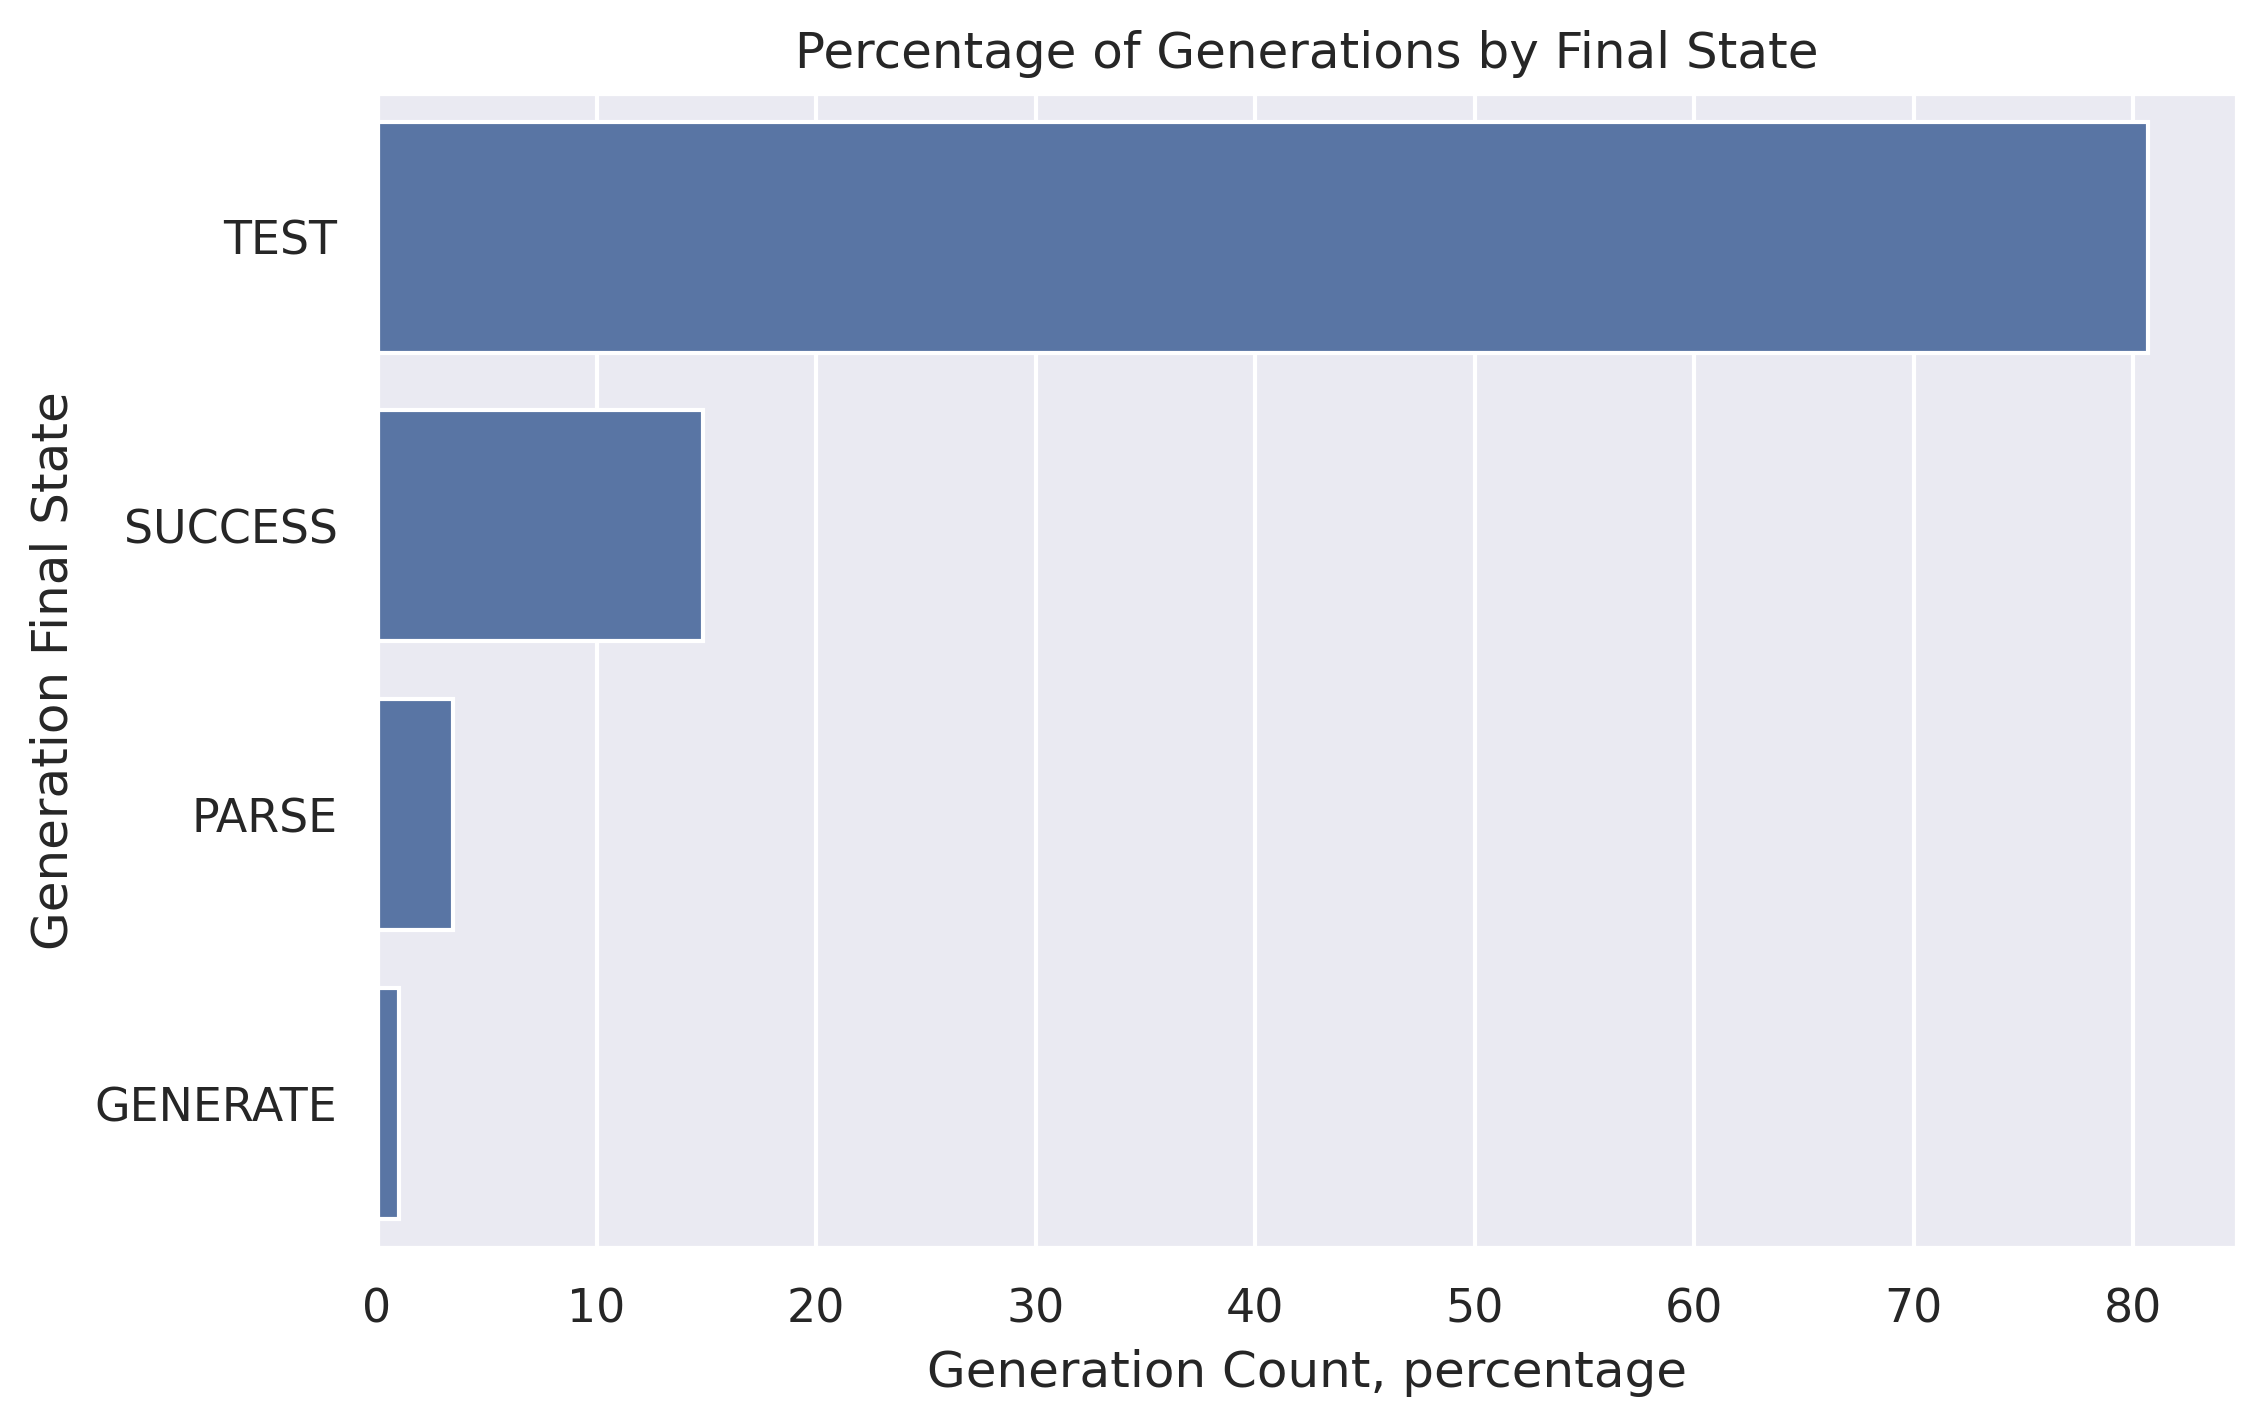

In [122]:
# Plot the number generations' final states
final_state = df['final_state'].value_counts(normalize=True) * 100

sns.barplot(y=final_state.index, x=final_state.values)
plt.title('Percentage of Generations by Final State')
plt.xlabel('Generation Count, percentage')
plt.ylabel('Generation Final State')
plt.show()

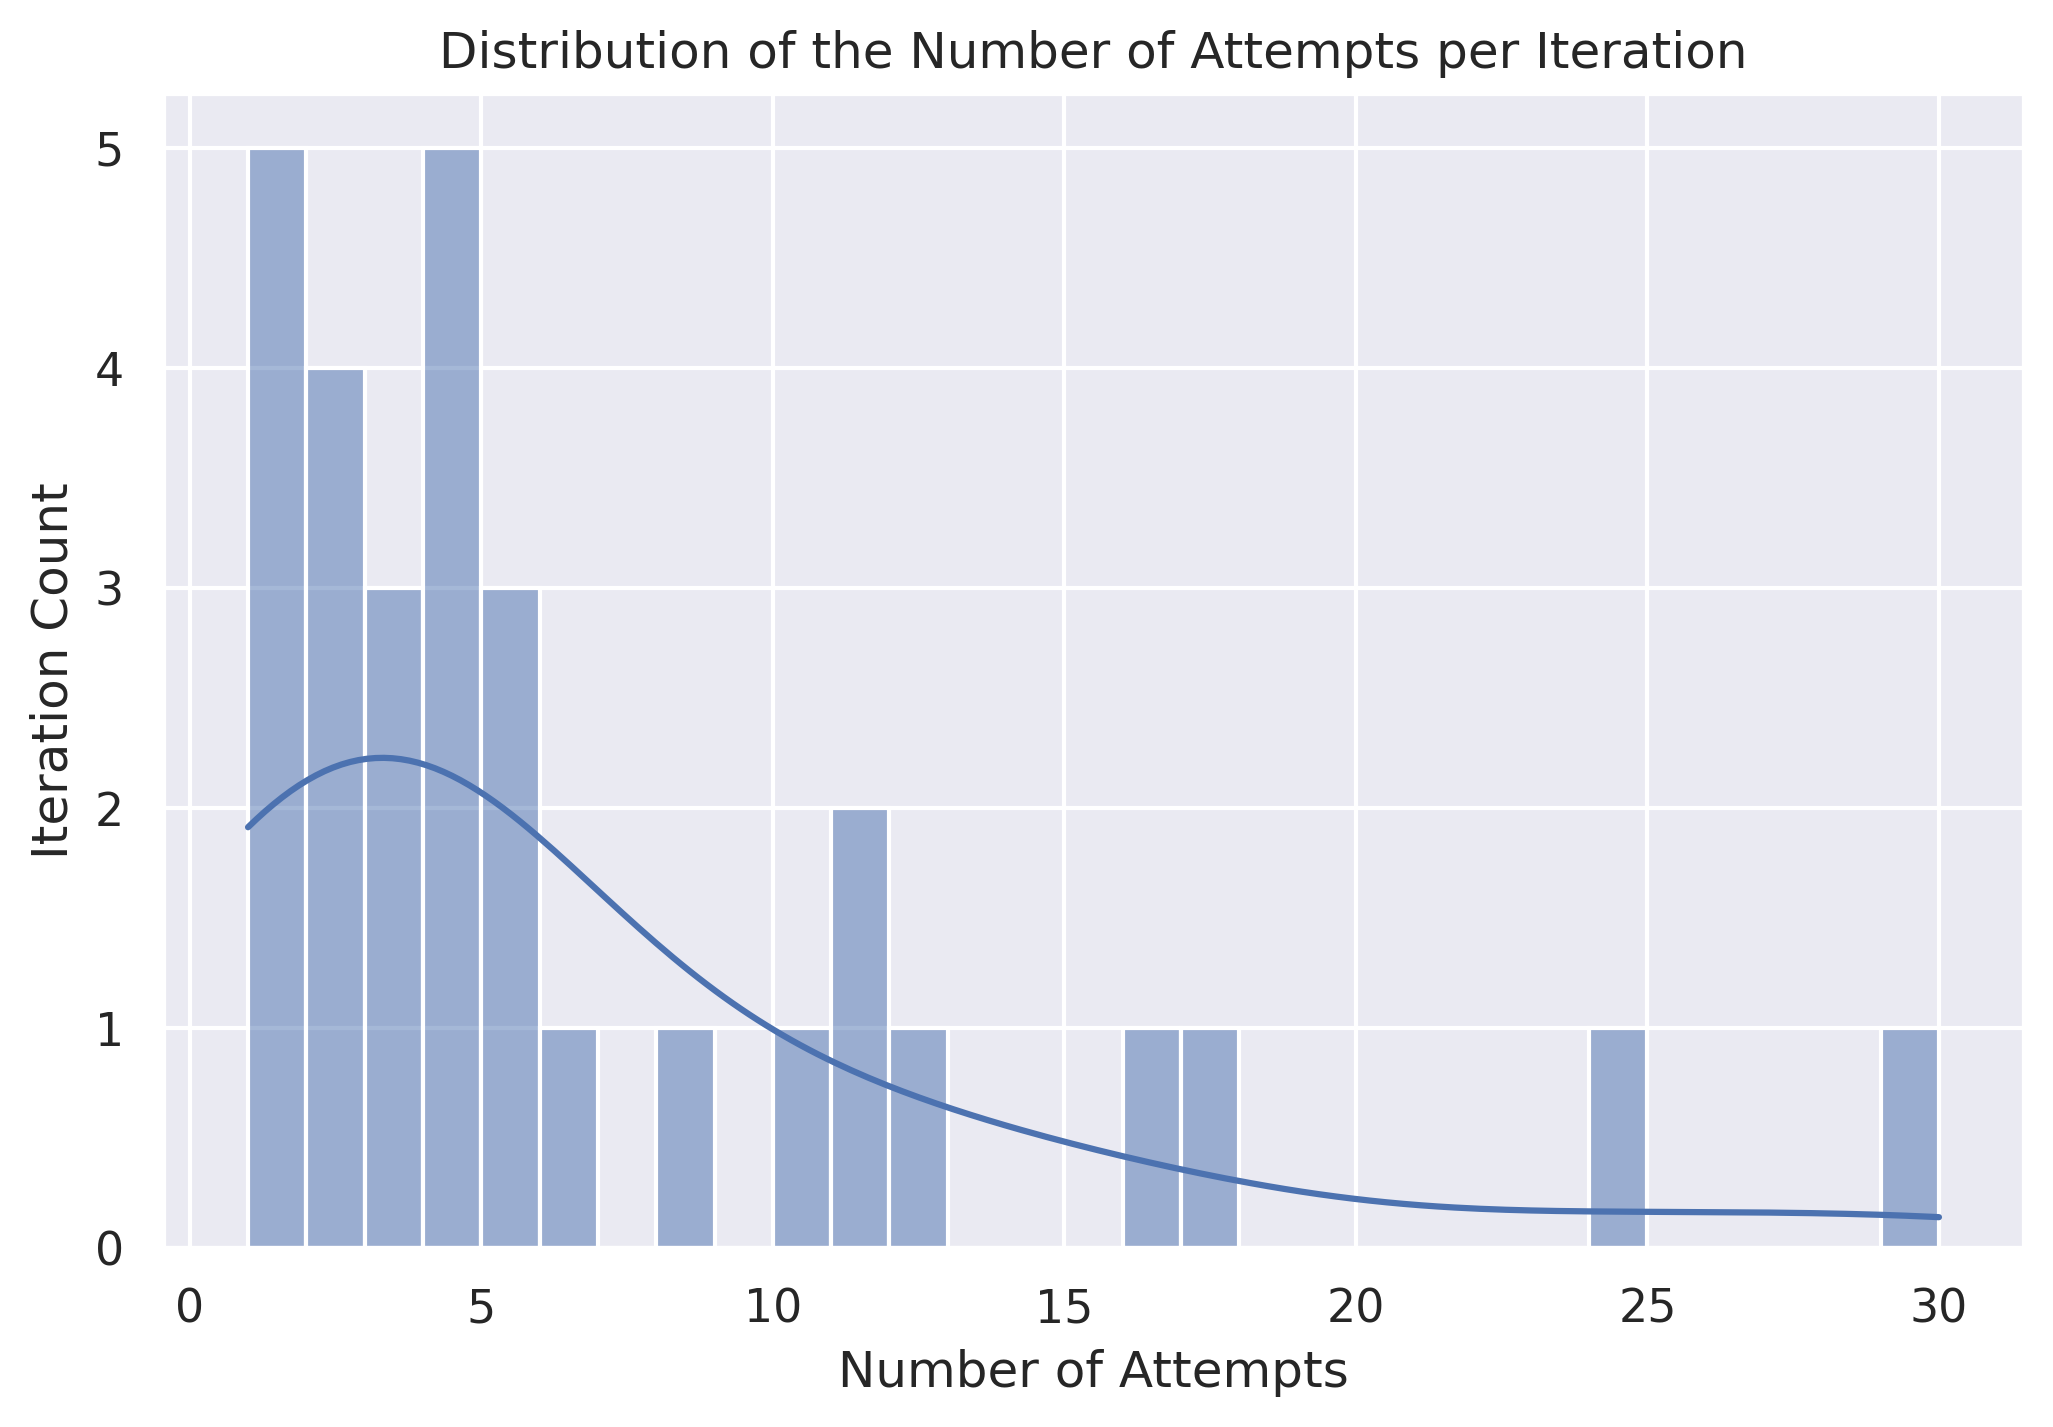

In [123]:
# Plot the distribution of the number of attempts
attempts = df.groupby('iteration')['attempt'].count()
sns.histplot(x=attempts, binwidth=1, kde=True)
plt.title('Distribution of the Number of Attempts per Iteration')
plt.xlabel('Number of Attempts')
plt.ylabel('Iteration Count')
plt.show()


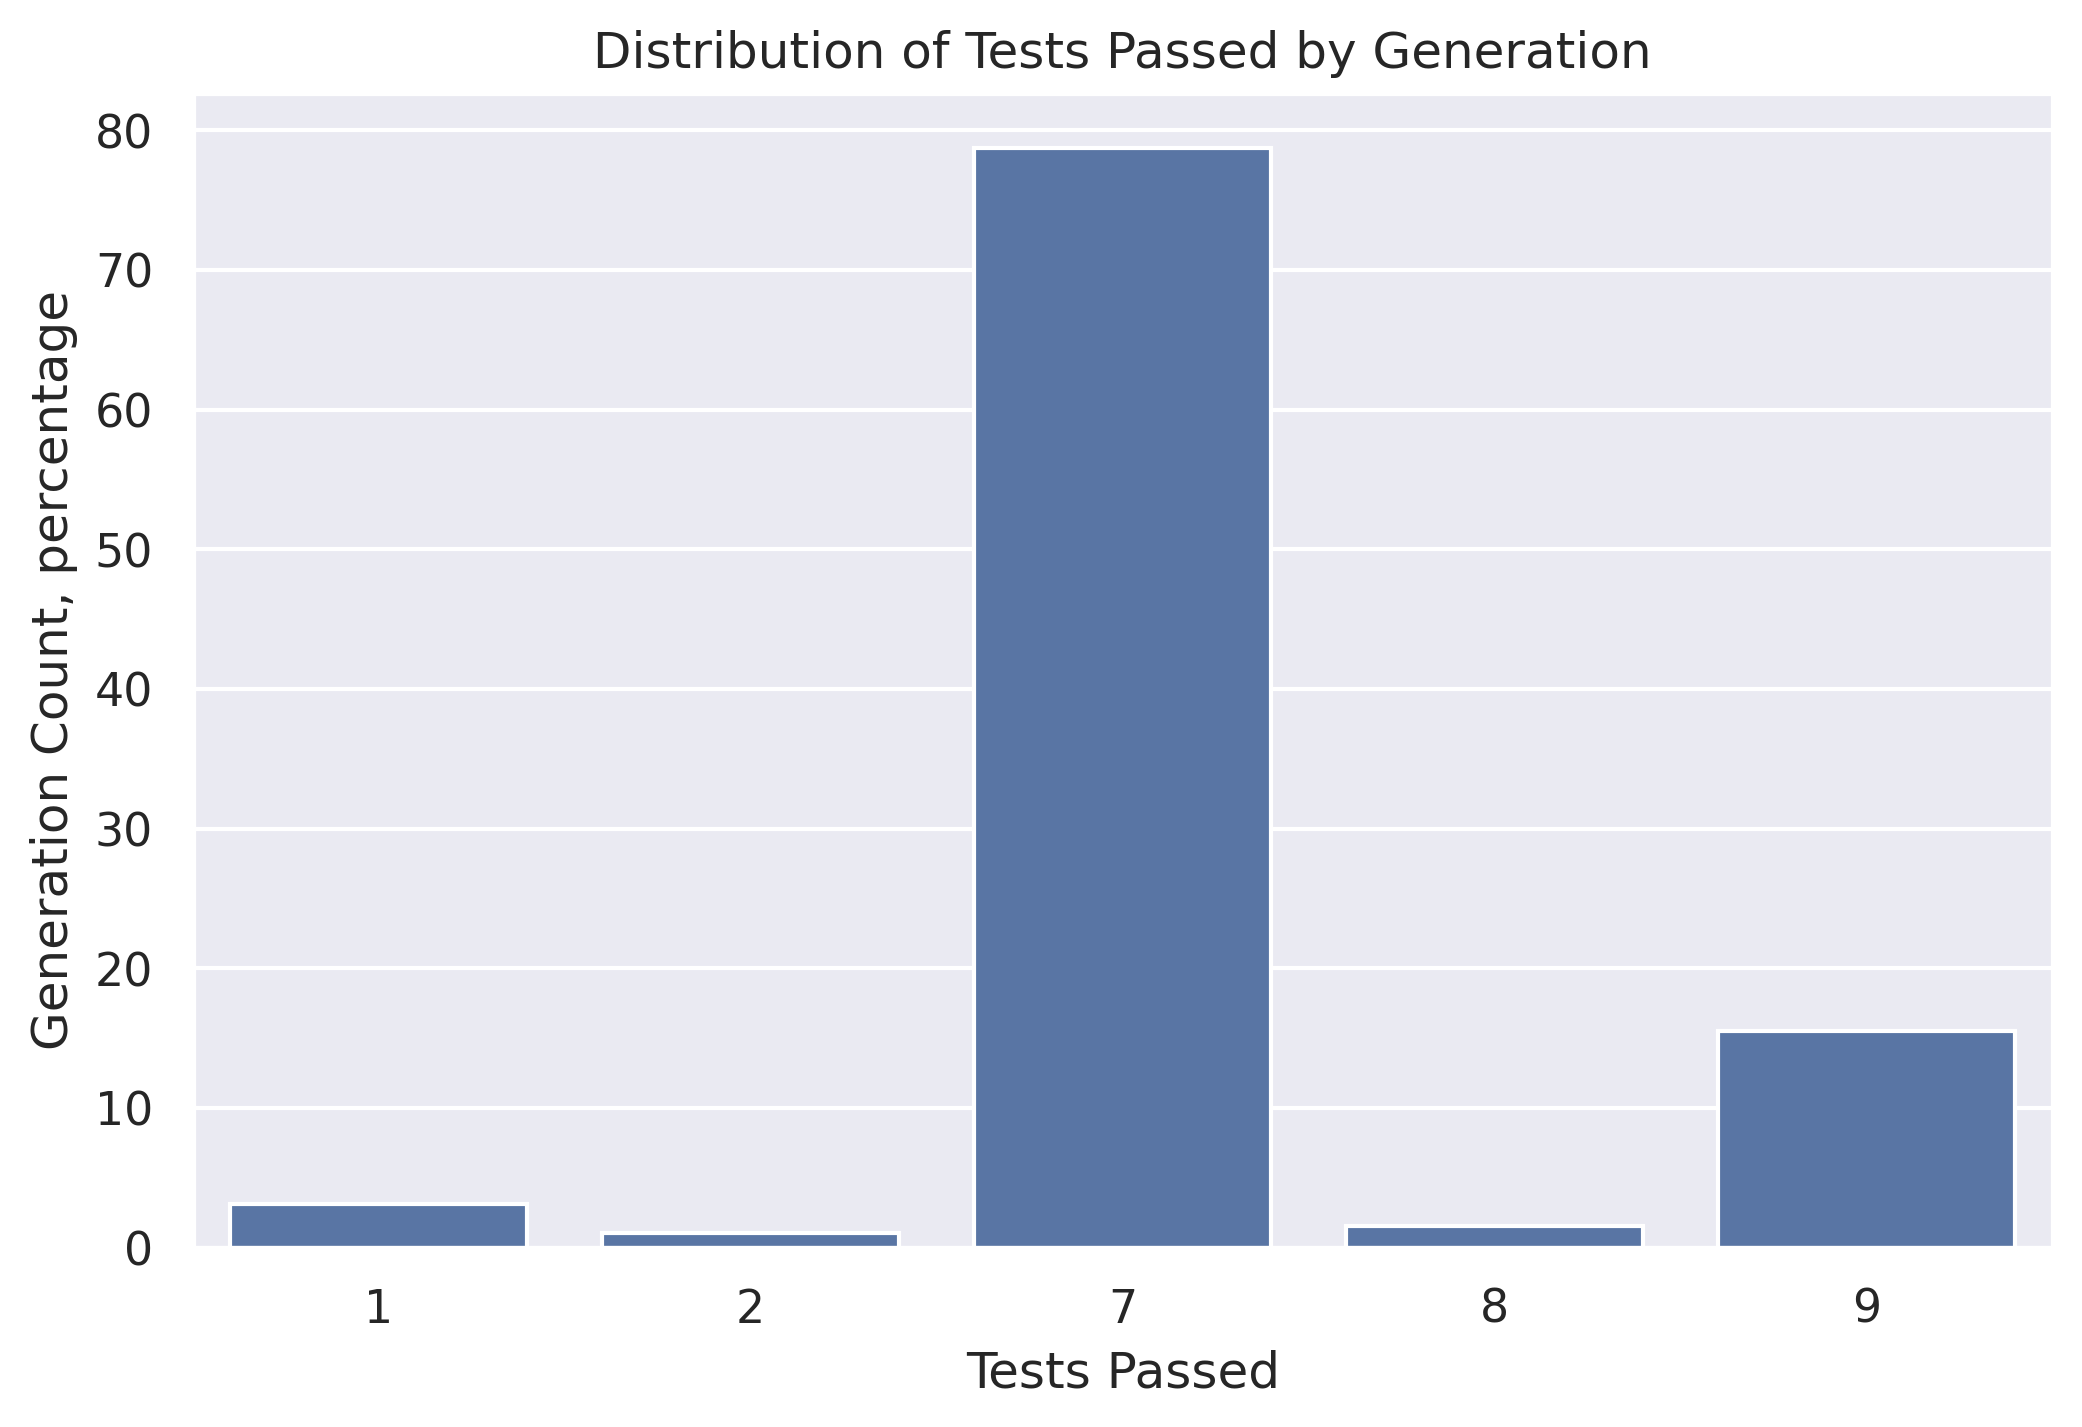

In [125]:
# Plot the distribution of tests passed
tests_passed = df[df['tests_passed'] >= 1]['tests_passed'].value_counts(normalize=True) * 100
sns.barplot(x=tests_passed.index, y=tests_passed.values, errorbar=None)
plt.title('Distribution of Tests Passed by Generation')
plt.xlabel('Tests Passed')
plt.ylabel('Generation Count, percentage')
plt.show()